In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import numpy as np
import ast
import json

In [ ]:
file_path = "/Users/seanlavi/dev/Schizophrenic_Speech/data/word_pred_llm.json"
with open(file_path, 'r', encoding = 'utf-8') as f:
    data_js = json.load(f)

In [ ]:
data_js

In [ ]:
for item in data_js:
    file_name = item['file_name']
    label = item['label']
    
    for question, vector in item['questions'].items():
        mean_value = np.mean(vector[1:])  # Calculate mean of the vector
        df_rows.append({
            'file_name': file_name,
            'label': label,
            'question': question,
            'mean_vector': mean_value
        })

# Create the DataFrame
df = pd.DataFrame(df_rows).dropna()

In [ ]:
df.head()

In [ ]:
total_nan = df.isna().sum().sum()
print(f"Total NaN records in DataFrame: {total_nan}")

In [ ]:
def detect_outliers_tukey(df, column):
    """
    Detect outliers in a column using the Tukey method.
    
    Parameters:
        df (pd.DataFrame): The DataFrame containing the data.
        column (str): The column name to detect outliers in.
    
    Returns:
        pd.Series: A boolean series indicating if a row is an outlier based on the column.
    """
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = (df[column] < lower_bound) | (df[column] > upper_bound)
    return outliers

# Apply the function to detect outliers in each column you are interested in
outliers_df = pd.DataFrame()
for column in ['mean_vector']:  # replace with your columns of interest
    outliers_df[column] = detect_outliers_tukey(df, column)

# Exclude rows where any column has an outlier
df_without_outliers = df[~outliers_df.any(axis=1)]
print("DataFrame without outliers based on the Tukey method:")
df_without_outliers


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# Assuming 'df' is already created from the previous code

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Normalize the 'mean_vector' column
df_without_outliers['normalized_mean_vector'] = scaler.fit_transform(df_without_outliers[['mean_vector']])

# Plotting Box Plots with Normalized Data
plt.figure(figsize=(7, 6))
sns.boxplot(x='label', y='normalized_mean_vector', data=df_without_outliers)
plt.title('Box plot of Normalized Mean Vector')
plt.xlabel('Label')
plt.ylabel('Normalized Mean Vector')

plt.tight_layout()
plt.show()


In [ ]:
# Plotting Histograms
# Separate into two groups based on label
schizo_group = df_without_outliers[df_without_outliers['label'] == 1]
regular_group = df_without_outliers[df_without_outliers['label'] == 0]
plt.figure(figsize=(14, 6))
for i, column in enumerate(['mean_vector']):
    plt.subplot(1, 3, i+1)
    sns.histplot(schizo_group[column], color='red', label='Schizophrenic', kde=True, stat="density", linewidth=0)
    sns.histplot(regular_group[column], color='blue', label='Regular', kde=True, stat="density", linewidth=0)
    plt.title(f'Histogram of {column}')
    plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
# T-Tests
t_test_results = {}
for column in ['mean_vector']:
    t_stat, p_value = ttest_ind(schizo_group[column], regular_group[column])
    t_test_results[column] = (t_stat, p_value)

# Display T-Test results
for feature, (t_stat, p_value) in t_test_results.items():
    print(f"\nT-Test for {feature}:")
    print(f"T-statistic: {t_stat:.4f}, P-value: {p_value:.4f}")
    
    # Null Hypothesis statement
    print(f"Null Hypothesis: There is no significant difference in the mean {feature} between schizophrenic and regular persons.")
    
    # Interpret results
    if p_value < 0.05:
        print("Result: Reject the null hypothesis. There is a statistically significant difference.")
    else:
        print("Result: Fail to reject the null hypothesis. There is no statistically significant difference.")


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import classification_report

# Prepare data for logistic regression
features = ['mean_vector']
X = df_without_outliers[features]
y = df_without_outliers['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)

# Classification Report on Test Data
y_pred = log_reg.predict(X_test_scaled)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

In [ ]:
from scipy.stats import pointbiserialr

# Assuming 'label' is your binary target variable
y = df['label']

# Dictionary to store results
pointbiserial_results = {}

# Loop through each feature column
for column in df.columns:
    if column in {'mean_tf_idf_seg_txt', "mean_tf_idf_tok_txt", "mean_count_vec"}:
        X = df[column]
        corr, p_value = pointbiserialr(y, X)
        pointbiserial_results[column] = (corr, p_value)

# Print results
for feature, (corr, p_value) in pointbiserial_results.items():
    print(f"Point-Biserial Correlation for {feature}: Corr={corr:.4f}, P-value={p_value:.4f}")


In [33]:
for item in data_js:
    file_name = item['file_name']
    label = item['label']
    
    for question, vector in item['questions'].items():
        mean_value = np.mean(vector[1:])  # Calculate mean of the vector
        df_rows.append({
            'file_name': file_name,
            'label': label,
            'question': question,
            'mean_vector': mean_value
        })

# Create the DataFrame
df = pd.DataFrame(df_rows).dropna()

/Users/seanlavi/dev/venvs/Schizophrenic_Speech/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/seanlavi/dev/venvs/Schizophrenic_Speech/lib/python3.9/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [34]:
df.head()

,file_name,label,question,mean_vector
0,ש16.docx,0,תמונה 1,2608.763636
1,ש16.docx,0,תמונה 2,2622.632653
2,ש16.docx,0,תמונה 3,2036.913043
3,ש16.docx,0,תמונה 4,2647.740000
4,ש16.docx,0,תמונה 5,1782.945455


In [35]:
total_nan = df.isna().sum().sum()
print(f"Total NaN records in DataFrame: {total_nan}")

Total NaN records in DataFrame: 0


In [43]:
def detect_outliers_tukey(df, column):
    """
    Detect outliers in a column using the Tukey method.
    
    Parameters:
        df (pd.DataFrame): The DataFrame containing the data.
        column (str): The column name to detect outliers in.
    
    Returns:
        pd.Series: A boolean series indicating if a row is an outlier based on the column.
    """
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = (df[column] < lower_bound) | (df[column] > upper_bound)
    return outliers

# Apply the function to detect outliers in each column you are interested in
outliers_df = pd.DataFrame()
for column in ['mean_vector']:  # replace with your columns of interest
    outliers_df[column] = detect_outliers_tukey(df, column)

# Exclude rows where any column has an outlier
df_without_outliers = df[~outliers_df.any(axis=1)]
print("DataFrame without outliers based on the Tukey method:")
df_without_outliers


DataFrame without outliers based on the Tukey method:


,file_name,label,question,mean_vector,normalized_mean_vector
0,ש16.docx,0,תמונה 1,2608.763636,0.034413
1,ש16.docx,0,תמונה 2,2622.632653,0.034696
2,ש16.docx,0,תמונה 3,2036.913043,0.022758
3,ש16.docx,0,תמונה 4,2647.740000,0.035208
4,ש16.docx,0,תמונה 5,1782.945455,0.017581
...,...,...,...,...,...
4315,יפ9.docx,1,תמונה 14,3247.478261,0.047432
4316,יפ9.docx,1,בר מצווה,2695.510638,0.036181
4317,יפ9.docx,1,מה אוהב לעשות,4786.578947,0.078802
4318,יפ9.docx,1,מה מעצבן,3077.318182,0.043963


/var/folders/b1/frm8p4wx2v1_r2r5qhspvnm80000gn/T/ipykernel_9694/1663753649.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_without_outliers['normalized_mean_vector'] = scaler.fit_transform(df_without_outliers[['mean_vector']])


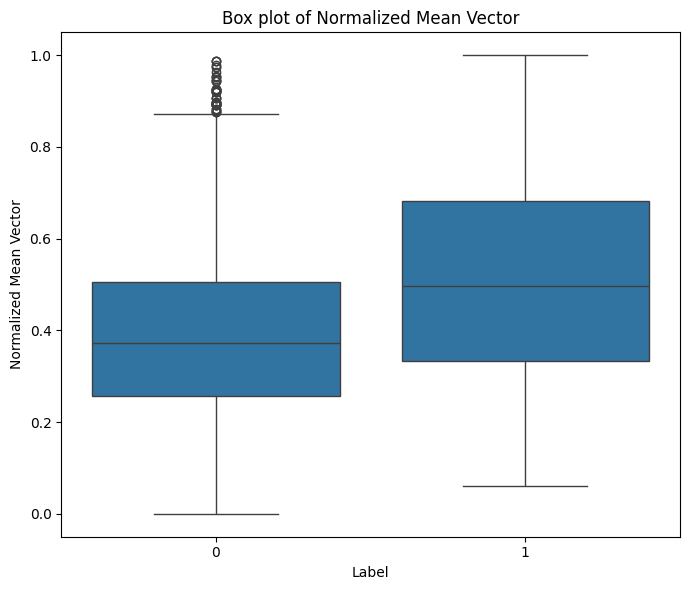

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# Assuming 'df' is already created from the previous code

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Normalize the 'mean_vector' column
df_without_outliers['normalized_mean_vector'] = scaler.fit_transform(df_without_outliers[['mean_vector']])

# Plotting Box Plots with Normalized Data
plt.figure(figsize=(7, 6))
sns.boxplot(x='label', y='normalized_mean_vector', data=df_without_outliers)
plt.title('Box plot of Normalized Mean Vector')
plt.xlabel('Label')
plt.ylabel('Normalized Mean Vector')

plt.tight_layout()
plt.show()


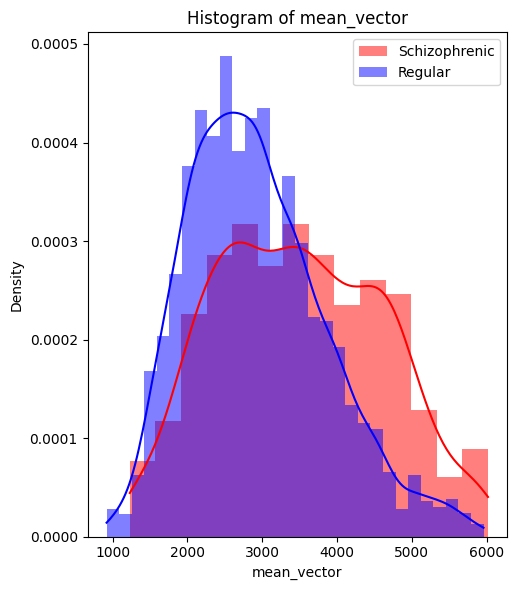

In [46]:
# Plotting Histograms
# Separate into two groups based on label
schizo_group = df_without_outliers[df_without_outliers['label'] == 1]
regular_group = df_without_outliers[df_without_outliers['label'] == 0]
plt.figure(figsize=(14, 6))
for i, column in enumerate(['mean_vector']):
    plt.subplot(1, 3, i+1)
    sns.histplot(schizo_group[column], color='red', label='Schizophrenic', kde=True, stat="density", linewidth=0)
    sns.histplot(regular_group[column], color='blue', label='Regular', kde=True, stat="density", linewidth=0)
    plt.title(f'Histogram of {column}')
    plt.legend()

plt.tight_layout()
plt.show()


In [48]:
# T-Tests
t_test_results = {}
for column in ['mean_vector']:
    t_stat, p_value = ttest_ind(schizo_group[column], regular_group[column])
    t_test_results[column] = (t_stat, p_value)

# Display T-Test results
for feature, (t_stat, p_value) in t_test_results.items():
    print(f"\nT-Test for {feature}:")
    print(f"T-statistic: {t_stat:.4f}, P-value: {p_value:.4f}")
    
    # Null Hypothesis statement
    print(f"Null Hypothesis: There is no significant difference in the mean {feature} between schizophrenic and regular persons.")
    
    # Interpret results
    if p_value < 0.05:
        print("Result: Reject the null hypothesis. There is a statistically significant difference.")
    else:
        print("Result: Fail to reject the null hypothesis. There is no statistically significant difference.")



T-Test for mean_vector:
T-statistic: 16.2332, P-value: 0.0000
Null Hypothesis: There is no significant difference in the mean mean_vector between schizophrenic and regular persons.
Result: Reject the null hypothesis. There is a statistically significant difference.


In [50]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import classification_report

# Prepare data for logistic regression
features = ['mean_vector']
X = df_without_outliers[features]
y = df_without_outliers['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)

# Classification Report on Test Data
y_pred = log_reg.predict(X_test_scaled)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.98      0.86       630
           1       0.57      0.08      0.14       205

    accuracy                           0.76       835
   macro avg       0.67      0.53      0.50       835
weighted avg       0.72      0.76      0.68       835



In [ ]:
from scipy.stats import pointbiserialr

# Assuming 'label' is your binary target variable
y = df['label']

# Dictionary to store results
pointbiserial_results = {}

# Loop through each feature column
for column in df.columns:
    if column in {'mean_tf_idf_seg_txt', "mean_tf_idf_tok_txt", "mean_count_vec"}:
        X = df[column]
        corr, p_value = pointbiserialr(y, X)
        pointbiserial_results[column] = (corr, p_value)

# Print results
for feature, (corr, p_value) in pointbiserial_results.items():
    print(f"Point-Biserial Correlation for {feature}: Corr={corr:.4f}, P-value={p_value:.4f}")
